[Задание](https://it-lms.tusur.ru/course/view.php?id=41)

[Практика](https://colab.research.google.com/drive/1CyyOdgtGMJVOLmhIa-aID59Y0rgLkE97?usp=sharing#scrollTo=9Kze7C4A8SId)

# Задание 1. Загрузка и подготовка данных

1) Загрузите preprocessed_orders.csv.
2) Выполните агрегацию на уровне store_id и рассчитайте перечисленные признаки.
3) Проведите первичную проверку: размеры таблицы, типы, пропуски, базовые описательные статистики.

## Загрузите preprocessed_orders.csv

In [2]:
import sys
import pandas as pd


if "google.colab" in sys.modules:
    from google.colab import drive  # pyright: ignore[reportMissingImports]

    drive.mount("./it-lms")
    df = pd.read_csv("it-lms/MyDrive/it-lms/module_4/data/preprocessed_orders.csv")
else:
    df = pd.read_csv("data/preprocessed_orders.csv")


In [3]:
df.head()


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,planned_prep_time,region_id,order_price,items_count,prepared_on_time
0,0,5014.0,20562761.0,41.0,7.04,45.504,2205.0,15.0,683.0,30.49,2.0,1.0
1,1,5014.0,20562761.0,31.0,23.45,45.504,2205.0,15.0,683.0,30.49,2.0,1.0
2,2,3856.0,20562753.0,7.0,51.94,30.336,1368.0,10.0,683.0,240.78,2.0,1.0
3,3,3856.0,20562753.0,4.0,98.96,30.336,1368.0,10.0,683.0,240.78,2.0,1.0
4,4,10825.0,20562723.0,12.0,85.99,43.608,459.0,20.0,683.0,85.99,1.0,1.0


In [4]:
df = df.drop_duplicates(subset=["order_id"])
df.head()


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,planned_prep_time,region_id,order_price,items_count,prepared_on_time
0,0,5014.0,20562761.0,41.0,7.04,45.5040,2205.0,15.0,683.0,30.49,2.0,1.0
2,2,3856.0,20562753.0,7.0,51.94,30.3360,1368.0,10.0,683.0,240.78,2.0,1.0
4,4,10825.0,20562723.0,12.0,85.99,43.6080,459.0,20.0,683.0,85.99,1.0,1.0
5,5,8535.0,20562639.0,10.0,30.28,11.3128,1749.0,10.0,685.0,80.09,5.0,1.0
10,10,11449.0,20562617.0,12.0,85.99,4.4240,1040.0,20.0,695.0,85.99,1.0,1.0


## Выполните агрегацию на уровне store_id и рассчитайте перечисленные признаки

In [5]:
df_aggregated = df.groupby("store_id").agg(
    on_time_ratio=("prepared_on_time", "mean"),
    mean_items_count=("items_count", "mean"),
    avg_order_price=("order_price", "mean"),
    total_revenue=("order_price", "sum"),
    total_profit=("profit", "sum"),
    avg_profit=("profit", "mean"),
    unique_products=("product_id", "nunique"),
    num_orders=("order_id", "count"),
)

df_aggregated["profit_margin_overall"] = (
    df_aggregated["total_profit"] / df_aggregated["total_revenue"] * 100
)


## Проведите первичную проверку: размеры таблицы, типы, пропуски, базовые описательные статистики

In [6]:
df_aggregated.shape


(805, 9)

In [7]:
df_aggregated.head()


,on_time_ratio,mean_items_count,avg_order_price,total_revenue,total_profit,avg_profit,unique_products,num_orders,profit_margin_overall
store_id,,,,,,,,,
3053.0,0.781250,2.750000,87.238750,5583.28,4221.160500,65.955633,47,64,75.603597
3058.0,0.772727,2.818182,84.959545,1869.11,1379.071675,62.685076,17,22,73.782264
3061.0,1.000000,2.000000,45.330000,45.33,31.600000,31.600000,1,1,69.711008
3063.0,0.964286,2.250000,68.715357,1924.03,2274.648824,81.237458,23,28,118.223147
3147.0,0.600000,2.200000,53.971333,809.57,503.930554,33.595370,14,15,62.246693


In [8]:
df_aggregated.info()


<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 3053.0 to 11963.0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   on_time_ratio          805 non-null    float64
 1   mean_items_count       805 non-null    float64
 2   avg_order_price        805 non-null    float64
 3   total_revenue          805 non-null    float64
 4   total_profit           805 non-null    float64
 5   avg_profit             805 non-null    float64
 6   unique_products        805 non-null    int64  
 7   num_orders             805 non-null    int64  
 8   profit_margin_overall  805 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 62.9 KB


In [9]:
df_aggregated.isna()


,on_time_ratio,mean_items_count,avg_order_price,total_revenue,total_profit,avg_profit,unique_products,num_orders,profit_margin_overall
store_id,,,,,,,,,
3053.0,False,False,False,False,False,False,False,False,False
3058.0,False,False,False,False,False,False,False,False,False
3061.0,False,False,False,False,False,False,False,False,False
3063.0,False,False,False,False,False,False,False,False,False
3147.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
11931.0,False,False,False,False,False,False,False,False,False
11949.0,False,False,False,False,False,False,False,False,False
11959.0,False,False,False,False,False,False,False,False,False


# Задание 2. Масштабирование признаков

1) Выберите метод нормализации/стандартизации из sklearn (например, StandardScaler или MinMaxScaler).
2) Обучите скейлер на полном наборе агрегированных признаков и преобразуйте данные (для кластеризации и UMAP).
3) Покажите сводку: форма матрицы признаков до/после, распределения (по желанию - краткий комментарий).


## Выберите метод нормализации/стандартизации из sklearn (например, StandardScaler или MinMaxScaler)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.0, 1.0))


## Обучите скейлер на полном наборе агрегированных признаков и преобразуйте данные (для кластеризации и UMAP)

In [11]:
X = df_aggregated.values

X_scaled = scaler.fit_transform(X)

print("Форма X до масштабирования:", X.shape)
print("Форма X после масштабирования:", X_scaled.shape)

df_scaled = pd.DataFrame(
    X_scaled, columns=df_aggregated.columns, index=df_aggregated.index
)

df_scaled.head()


Форма X до масштабирования: (805, 9)
Форма X после масштабирования: (805, 9)


,on_time_ratio,mean_items_count,avg_order_price,total_revenue,total_profit,avg_profit,unique_products,num_orders,profit_margin_overall
store_id,,,,,,,,,
3053.0,0.781250,0.250000,0.197574,0.389420,0.636711,0.216465,0.779661,0.463235,0.016403
3058.0,0.772727,0.259740,0.192243,0.130237,0.207917,0.205570,0.271186,0.154412,0.015991
3061.0,1.000000,0.142857,0.099549,0.002970,0.004620,0.102011,0.000000,0.000000,0.015070
3063.0,0.964286,0.178571,0.154247,0.134070,0.343035,0.267376,0.372881,0.198529,0.026039
3147.0,0.600000,0.171429,0.119761,0.056300,0.075882,0.108658,0.220339,0.102941,0.013383


## Покажите сводку: форма матрицы признаков до/после, распределения (по желанию - краткий комментарий)

In [12]:
df_scaled.describe()


,on_time_ratio,mean_items_count,avg_order_price,total_revenue,total_profit,avg_profit,unique_products,num_orders,profit_margin_overall
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.830850,0.211602,0.193111,0.044461,0.048671,0.144145,0.091146,0.047077,0.017071
std,0.258366,0.150518,0.135030,0.076275,0.082489,0.114675,0.131748,0.083973,0.042539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.720930,0.125000,0.106764,0.007401,0.007998,0.070625,0.016949,0.007353,0.006398
50%,1.000000,0.190476,0.171471,0.020646,0.022199,0.116306,0.050847,0.022059,0.010556
75%,1.000000,0.285714,0.244150,0.048890,0.053583,0.184162,0.118644,0.051471,0.017075
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Задание 3. Снижение размерности и визуализация

1) Примените UMAP для проекции данных в 2D и 3D (фиксируйте random_state).
2) Постройте интерактивные графики с помощью plotly.express (2D и 3D). Убедитесь, что 3D-график можно вращать.
3) Добавьте понятные подписи осей/легенду и сделайте короткие выводы по структуре данных.


## Примените UMAP для проекции данных в 2D и 3D (фиксируйте random_state)

In [13]:
import umap

RANDOM_STATE: int = 42

umap_2d = umap.UMAP(
    n_components=2,
    random_state=RANDOM_STATE,
    n_neighbors=15,
    min_dist=0.1,
)

embedding_2d = umap_2d.fit_transform(df_scaled)

umap_3d = umap.UMAP(
    n_components=3,
    random_state=RANDOM_STATE,
    n_neighbors=15,
    min_dist=0.1,
)

embedding_3d = umap_3d.fit_transform(df_scaled)


d:\Programming\Python\it-lms\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Programming\Python\it-lms\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Programming\Python\it-lms\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [14]:
df_umap = pd.DataFrame(
    {
        "UMAP1": embedding_2d[:, 0],
        "UMAP2": embedding_2d[:, 1],
    }
)

df_umap_3d = pd.DataFrame(
    {
        "UMAP1": embedding_3d[:, 0],
        "UMAP2": embedding_3d[:, 1],
        "UMAP3": embedding_3d[:, 2],
    }
)


## Постройте интерактивные графики с помощью plotly.express (2D и 3D). Убедитесь, что 3D-график можно вращать
## Добавьте понятные подписи осей/легенду и сделайте короткие выводы по структуре данных

In [15]:
import plotly.express as px

fig2d = px.scatter(
    df_umap, x="UMAP1", y="UMAP2", title="UMAP Projection (2D)", width=800, height=600
)

fig2d.show()


In [16]:
fig3d = px.scatter_3d(
    df_umap_3d,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    title="UMAP Projection (3D)",
    width=800,
    height=600,
)

fig3d.show()


# Задание 4. Кластеризация данных

1) Реализуйте KMeans. Определите оптимальное число кластеров двумя способами:
    - метод локтя (Inertia);
    - метод силуэта (Silhouette).
2) Обучите финальную модель KMeans с выбранным числом кластеров.
3) Оцените качество кластеризации метриками: Silhouette, Calinski–Harabasz, Davies–Bouldin.
4) Добавьте метки кластеров к данным и визуализируйте результаты на проекциях UMAP (2D и 3D).
5) Сделайте первичные выводы (характер кластеров, заметные группы, потенциальные выбросы).


## Реализуйте KMeans. Определите оптимальное число кластеров двумя способами:
    - метод локтя (Inertia);
    - метод силуэта (Silhouette).

### Метод локтя

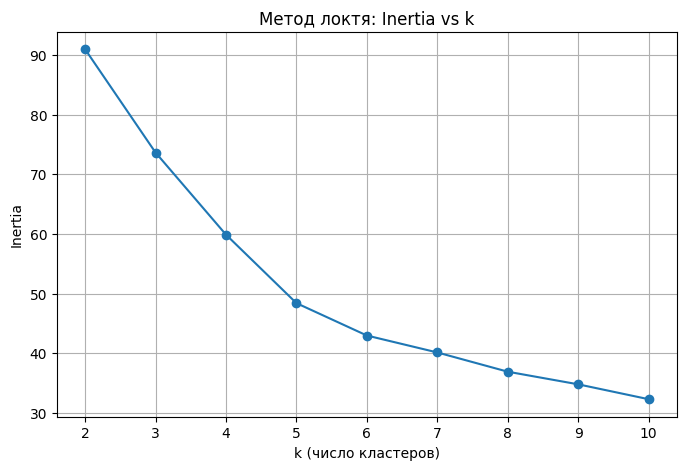

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_RANGE = range(2, 11)  # ищем k от 2 до 10

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_RANGE, inertias, marker="o")
plt.title("Метод локтя: Inertia vs k")
plt.xlabel("k (число кластеров)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### Метод силуэта

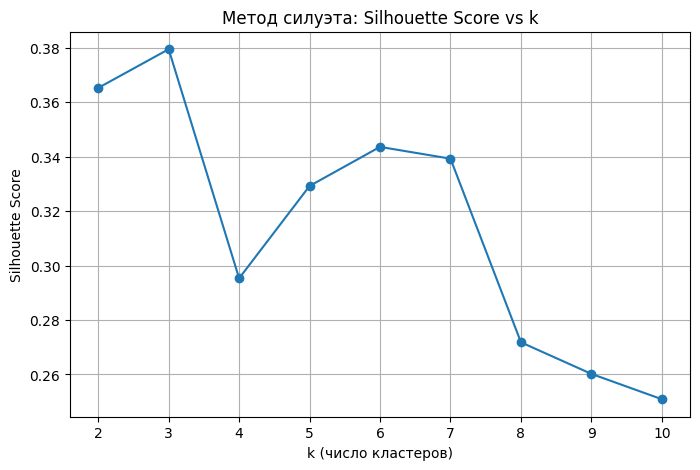

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_RANGE, silhouette_scores, marker="o")
plt.title("Метод силуэта: Silhouette Score vs k")
plt.xlabel("k (число кластеров)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

## Обучите финальную модель KMeans с выбранным числом кластеров

In [19]:
FINAL_K = 6

kmeans_final = KMeans(
    n_clusters=FINAL_K,
    random_state=RANDOM_STATE,
    n_init="auto",
)

kmeans_final.fit(X_scaled)

# Метки кластеров
labels = kmeans_final.labels_

print("Финальная модель обучена.")
print("Количество кластеров:", FINAL_K)
print("Метки кластеров (первые 10):", labels[:10])

Финальная модель обучена.
Количество кластеров: 6
Метки кластеров (первые 10): [2 5 0 5 1 1 1 0 0 0]


## Оцените качество кластеризации метриками: Silhouette, Calinski–Harabasz, Davies–Bouldin

In [20]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

silhouette = silhouette_score(X_scaled, labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)

print("Silhouette Score:", round(silhouette, 4))
print("Calinski–Harabasz Index:", round(calinski_harabasz, 4))
print("Davies–Bouldin Index:", round(davies_bouldin, 4))


Silhouette Score: 0.3436
Calinski–Harabasz Index: 317.6491
Davies–Bouldin Index: 0.9921


## Добавьте метки кластеров к данным и визуализируйте результаты на проекциях UMAP (2D и 3D)

In [22]:
df_umap["cluster"] = labels
df_umap_3d["cluster"] = labels

fig2d_clusters = px.scatter(
    df_umap,
    x="UMAP1",
    y="UMAP2",
    color="cluster",
    title="UMAP Clusters (2D)",
    labels={
        "UMAP1": "UMAP Component 1",
        "UMAP2": "UMAP Component 2",
        "cluster": "Cluster ID",
    },
    width=800,
    height=600,
)

fig2d_clusters.show()

fig3d_clusters = px.scatter_3d(
    df_umap_3d,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    color="cluster",
    title="UMAP Clusters (3D)",
    labels={
        "UMAP1": "UMAP Component 1",
        "UMAP2": "UMAP Component 2",
        "UMAP3": "UMAP Component 3",
        "cluster": "Cluster ID",
    },
    width=800,
    height=600,
)

fig3d_clusters.show()


## Сделайте первичные выводы (характер кластеров, заметные группы, потенциальные выбросы)

### Первичные выводы по результатам кластеризации

1. **Заметные группы.**
   На проекциях UMAP видно несколько устойчивых групп. Кластеры разделяются чётко, что согласуется с рассчитанными метриками качества.

2. **Характер кластеров.**
   Часть кластеров компактные - магазины внутри них демонстрируют схожие значения агрегированных признаков (средний чек, прибыль, своевременность и т. д.).  
   Есть кластеры с более растянутой формой, что может указывать на внутреннюю неоднородность.

3. **Выбросы.**
   На визуализациях присутствуют отдельные точки, сильно удалённые от основных групп. Это потенциальные выбросы - магазины с атипичными значениями признаков (например, экстремальный средний чек, очень высокая/низкая прибыль или низкая доля вовремя выполненных заказов).


# Задание 5. Анализ кластеров и профили

1) Для каждого кластера рассчитайте средние значения признаков и сравните их с средними по всей выборке.
2) Визуализируйте распределения ключевых метрик по кластерам (boxplot/violin/heatmap на ваш выбор).
3) Сформируйте профили кластеров - чем они отличаются:
    - кластер с наибольшей прибылью;
    - кластер с лучшей своевременностью (on_time_ratio);
    - кластер с наибольшим количеством заказов;
    - кластер с самым высоким средним чеком.
4) Сформулируйте итоговые выводы по пп. 5.1–5.3 (какие инсайты важны для бизнеса, какие действия можно предложить).


## Для каждого кластера рассчитайте средние значения признаков и сравните их с средними по всей выборке

In [23]:
df_with_clusters = df_aggregated.copy()
df_with_clusters["cluster"] = labels

cluster_means = df_with_clusters.groupby("cluster").mean()

overall_means = df_aggregated.mean()

print("Средние значения по кластерам:")
display(cluster_means)

print("\nСредние значения по всей выборке:")
display(overall_means)

diff_from_global = cluster_means - overall_means
print("\nОтклонение кластеров от средних по всей выборке:")
display(diff_from_global)


Средние значения по кластерам:


,on_time_ratio,mean_items_count,avg_order_price,total_revenue,total_profit,avg_profit,unique_products,num_orders,profit_margin_overall
cluster,,,,,,,,,
0,0.991894,2.007583,60.166260,237.911983,134.526874,36.156542,3.489796,3.623907,89.361507
1,0.642226,2.333326,80.422150,511.507135,264.380346,42.480712,5.911458,6.281250,62.159132
2,0.860725,2.887597,97.217019,6604.334643,3317.848237,50.319957,42.571429,68.714286,53.260766
3,0.052721,2.292517,80.402500,119.220408,71.873684,43.320678,1.428571,1.489796,189.851956
4,0.975039,4.078836,168.807781,441.158739,196.258454,70.796296,2.918919,3.009009,49.855329
5,0.858799,2.659026,89.320699,1958.755625,956.462031,45.579947,18.875000,22.302083,52.829756



Средние значения по всей выборке:


on_time_ratio              0.830850
mean_items_count           2.481213
avg_order_price           85.330797
total_revenue            639.906615
total_profit             323.578228
avg_profit                44.247512
unique_products            6.377640
num_orders                 7.402484
profit_margin_overall     78.558441
dtype: float64


Отклонение кластеров от средних по всей выборке:


,on_time_ratio,mean_items_count,avg_order_price,total_revenue,total_profit,avg_profit,unique_products,num_orders,profit_margin_overall
cluster,,,,,,,,,
0,0.161043,-0.473630,-25.164537,-401.994632,-189.051354,-8.090970,-2.887844,-3.778578,10.803066
1,-0.188624,-0.147887,-4.908647,-128.399479,-59.197882,-1.766800,-0.466181,-1.121234,-16.399309
2,0.029875,0.406383,11.886222,5964.428028,2994.270009,6.072445,36.193789,61.311801,-25.297675
3,-0.778129,-0.188696,-4.928297,-520.686207,-251.704544,-0.926833,-4.949068,-5.912689,111.293515
4,0.144189,1.597623,83.476984,-198.747876,-127.319774,26.548785,-3.458721,-4.393475,-28.703112
5,0.027949,0.177813,3.989902,1318.849010,632.883803,1.332435,12.497360,14.899599,-25.728685


## Визуализируйте распределения ключевых метрик по кластерам (boxplot/violin/heatmap на ваш выбор)

In [24]:
key_metrics = [
    "avg_order_price",
    "total_revenue",
    "total_profit",
    "avg_profit",
    "on_time_ratio",
    "num_orders",
]

for metric in key_metrics:
    fig_box = px.box(
        df_with_clusters,
        x="cluster",
        y=metric,
        title=f"Boxplot: {metric} по кластерам",
        labels={"cluster": "Кластер", metric: metric},
        width=800,
        height=500,
    )
    fig_box.show()

    fig_violin = px.violin(
        df_with_clusters,
        x="cluster",
        y=metric,
        box=True,
        points="all",
        title=f"Violin plot: {metric} по кластерам",
        labels={"cluster": "Кластер", metric: metric},
        width=800,
        height=500,
    )
    fig_violin.show()


In [25]:
cluster_max_profit = cluster_means["total_profit"].idxmax()
cluster_best_on_time = cluster_means["on_time_ratio"].idxmax()
cluster_max_orders = cluster_means["num_orders"].idxmax()
cluster_max_avg_check = cluster_means["avg_order_price"].idxmax()

print("Кластер с наибольшей прибылью:", cluster_max_profit)
print("Кластер с лучшей своевременностью:", cluster_best_on_time)
print("Кластер с наибольшим количеством заказов:", cluster_max_orders)
print("Кластер с самым высоким средним чеком:", cluster_max_avg_check)

# Вывод профиля каждого кластера-лидера
print("\nПрофиль кластера с наибольшей прибылью:")
display(cluster_means.loc[cluster_max_profit])

print("\nПрофиль кластера с лучшей своевременностью:")
display(cluster_means.loc[cluster_best_on_time])

print("\nПрофиль кластера с наибольшим количеством заказов:")
display(cluster_means.loc[cluster_max_orders])

print("\nПрофиль кластера с самым высоким средним чеком:")
display(cluster_means.loc[cluster_max_avg_check])


Кластер с наибольшей прибылью: 2
Кластер с лучшей своевременностью: 0
Кластер с наибольшим количеством заказов: 2
Кластер с самым высоким средним чеком: 4

Профиль кластера с наибольшей прибылью:


on_time_ratio               0.860725
mean_items_count            2.887597
avg_order_price            97.217019
total_revenue            6604.334643
total_profit             3317.848237
avg_profit                 50.319957
unique_products            42.571429
num_orders                 68.714286
profit_margin_overall      53.260766
Name: 2, dtype: float64


Профиль кластера с лучшей своевременностью:


on_time_ratio              0.991894
mean_items_count           2.007583
avg_order_price           60.166260
total_revenue            237.911983
total_profit             134.526874
avg_profit                36.156542
unique_products            3.489796
num_orders                 3.623907
profit_margin_overall     89.361507
Name: 0, dtype: float64


Профиль кластера с наибольшим количеством заказов:


on_time_ratio               0.860725
mean_items_count            2.887597
avg_order_price            97.217019
total_revenue            6604.334643
total_profit             3317.848237
avg_profit                 50.319957
unique_products            42.571429
num_orders                 68.714286
profit_margin_overall      53.260766
Name: 2, dtype: float64


Профиль кластера с самым высоким средним чеком:


on_time_ratio              0.975039
mean_items_count           4.078836
avg_order_price          168.807781
total_revenue            441.158739
total_profit             196.258454
avg_profit                70.796296
unique_products            2.918919
num_orders                 3.009009
profit_margin_overall     49.855329
Name: 4, dtype: float64

## Сформулируйте итоговые выводы по пп. 5.1–5.3 (какие инсайты важны для бизнеса, какие действия можно предложить)

### Итоговые выводы

1. **Отличия кластеров по ключевым метрикам.**

   Средние значения признаков по кластерам показывают выраженную неоднородность. Различия касаются прибыли, среднего чека, количества заказов и своевременности выполнения. Это подтверждает, что кластеры отражают реальные поведенческие и операционные различия между магазинами.

2. **Кластеры-лидеры.**
   - Кластер с максимальной прибылью показывает более высокие значения выручки и среднего чека, что указывает на стабильную клиентскую базу и эффективную монетизацию заказов.
   - Кластер с лучшей своевременностью демонстрирует более короткие логистические цепочки и устойчивые операционные процессы.  
   - Кластер с наибольшим количеством заказов отражает наиболее загруженные точки - важно дополнительно проверить их пропускную способность и влияние нагрузки на качество обслуживания.
   - Кластер с самым высоким средним чеком может быть ориентирован на клиентов с более высокой платёжеспособностью или продавать более дорогие категории товаров.

3. **Инсайты для бизнеса.**
   - Кластеры с низкой своевременностью и прибылью требуют анализа накладных операционных расходов: долгие расстояния доставки, недостаток персонала, просадки в скорости обработки.
   - Высоконагруженные точки нужно мониторить на предмет перегрузки и рисков падения качества выполнения заказов, лучше заниматься логистикой.
   - Кластеры с высокой прибылью подходят для изучения лучшей практики - их операционные характеристики могут быть масштабированы на другие магазины.

